<a href="https://colab.research.google.com/github/claudengantchou/ClaudeNgantchou/blob/main/Claude_Ngantchou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary libraries

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from scipy.stats import shapiro
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNetCV

  # Install and Import XGBoost
!pip install xgboost
from xgboost import XGBRegressor

In [ ]:
# 📌  1.  Import the Data into the session (From google drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset1_path = '/content/drive/MyDrive/ReducedDatasets/ReducedDataset2017.xlsx' # Read the 2017 Reduced dataset
df1 = pd.read_excel(dataset1_path)

In [ ]:
import pandas as pd
dataset2_path = '/content/drive/MyDrive/ReducedDatasets/ReducedDataset2018.xlsx' # Read the 2018 Reduced dataset
df2 = pd.read_excel(dataset2_path)

In [ ]:
import pandas as pd
dataset3_path = '/content/drive/MyDrive/ReducedDatasets/ReducedDataset2019.xlsx'  # Read the 2019 Reduced dataset
df3 = pd.read_excel(dataset3_path)

In [ ]:
import pandas as pd
dataset4_path = '/content/drive/MyDrive/ReducedDatasets/ReducedDataset2020.xlsx'  # Read the 2020 Reduced dataset
df4 = pd.read_excel(dataset4_path)

In [ ]:
import pandas as pd
dataset5_path = '/content/drive/MyDrive/ReducedDatasets/ReducedDataset2021.xlsx'  # Read the 2021 Reduced dataset
df5 = pd.read_excel(dataset5_path)

In [ ]:
import pandas as pd
dataset6_path = '/content/drive/MyDrive/ReducedDatasets/ReducedDataset2022.xlsx'  # Read the 2022 Reduced dataset
df6 = pd.read_excel(dataset6_path)

In [ ]:
df1.insert(0, 'Year', 2017) # Add a column for the year 2017

In [ ]:
df2.insert(0, 'Year', 2018) # Add a column for the year 2018

In [ ]:
df3.insert(0, 'Year', 2019) # Add a column for the year 2019

In [ ]:
df4.insert(0, 'Year', 2020) # Add a column for the year 2020

In [ ]:
df5.insert(0, 'Year', 2021) # Add a column for the year 2021

In [ ]:
df6.insert(0, 'Year', 2022) # Add a column for the year 2022

In [ ]:
# 📌  2. Basic data transformation and cleaning

In [ ]:
# Combine all data together — ignore column order, missing columns will be filled with NaN
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True, sort=False)

In [ ]:
df.columns = df.columns.str.strip()     # Strip whitespace

In [ ]:
df.columns = df.columns.str.lower()  # Makes them all lowercase

In [ ]:
# remove surrounding spaces and make title case for the following string variables
start_col = 'county'
end_col = 'grades_served'

# Identify the specific string columns to be cleaned based on the context
# and known object-type columns that need title casing.
string_cols_for_cleaning = ['county', 'district_type', 'district_size', 'school_type']

for col in string_cols_for_cleaning:
    if col in df.columns:  # Ensure the column exists before processing
        df[col] = df[col].astype(str).str.strip().str.title()
    else:
        print(f"Warning: Column '{col}' not found for cleaning.")


KeyError: 'grades_served'

In [ ]:
# 📌2.   Check for values under school type
print(df["school_type"].value_counts())

school_type
Elementary     11955
Nan             8086
High School     3348
Middle Schl     3011
Charter Sch      695
Prek             345
Name: count, dtype: int64


In [ ]:
#   Keep only rows where school_type is "High School"
final_df = df[df["school_type"] == "High School"]

In [ ]:
#   Reset index after filtering
final_df = final_df.reset_index(drop=True)

In [ ]:
#   Check if only high schools remain
print(final_df["school_type"].value_counts())
print(final_df["year"].value_counts())

school_type
High School    3348
Name: count, dtype: int64
year
2018    653
2020    651
2019    650
2021    648
2017    644
2022    102
Name: count, dtype: int64


In [ ]:
# # Try converting any object column to numeric if possible
for col in final_df.select_dtypes(include='object').columns:
    converted = pd.to_numeric(final_df[col], errors='coerce')
    # Only overwrite if at least one value was converted successfully
    if converted.notna().sum() > 0:
        final_df[col] = converted
        print(f"Column '{col}' successfully converted to numeric.")
    else:
        print(f"Column '{col}' could not be converted to numeric.")

Column 'county' could not be converted to numeric.
Column 'district_type' could not be converted to numeric.
Column 'district_size' could not be converted to numeric.
Column 'school_type' could not be converted to numeric.
Column 'grades_served' successfully converted to numeric.
Column 'mobility_rate_el' successfully converted to numeric.
Column 'mobility_rate_iep' successfully converted to numeric.
Column 'chronically_truant' successfully converted to numeric.
Column 'chronic_truancy_rate' successfully converted to numeric.
Column 'dropout_rate_white' successfully converted to numeric.
Column 'dropout_rate_hispanic' successfully converted to numeric.
Column 'dropout_rate_asian' successfully converted to numeric.
Column 'dropout_rate_el' successfully converted to numeric.
Column 'class_size_high' successfully converted to numeric.
Column 'pe_days' successfully converted to numeric.
Column 'turnover' successfully converted to numeric.


In [ ]:
      # Convert district size into numeric categories
# Check how the unique variables are stored
print(final_df["district_size"].value_counts())

  # Create a mapping dictionary
size_mapping = {
    'Small': 1,
    'Medium': 2,
    'Large': 3
}

    # Apply the mapping (NaNs are preserved by default)
final_df['district_size_encoded'] = final_df['district_size'].map(size_mapping)

    # Confirm if worked.
print(final_df["district_size_encoded"].value_counts())

district_size
Large     1498
Medium    1264
Small      550
Nan         36
Name: count, dtype: int64
district_size_encoded
3.0    1498
2.0    1264
1.0     550
Name: count, dtype: int64


In [ ]:
# 📌3.   Describe the data, then sum the missing values per column and get info for the datatypes

#   Count missing values per variable
print(final_df.isnull().sum())

#   Data types for the variables
print(final_df.info())


year                          0
county                        0
district_type                 0
district_size                 0
school_type                   0
grades_served              3332
enrolment_total               0
enrolment_white             177
enrolment_black             814
enrolment_hispanic          573
enrolment_asian            1275
enrolment_el               1206
enrolment_iep                51
enrolment_low_income          4
enrolment_homeless          878
attendance_rate              31
mobility_rate                 1
mobility_rate_el           2150
mobility_rate_iep           710
chronically_truant          595
chronic_truancy_rate        595
dropout_rate_total            2
dropout_rate_male             6
dropout_rate_female          31
dropout_rate_white          782
dropout_rate_black         1213
dropout_rate_hispanic       977
dropout_rate_asian         1744
dropout_rate_el            1549
dropout_rate_iep            104
dropout_rate_low_income      17
class_si

In [ ]:
# 📌4.   Those with more than 50% missing data be dropped

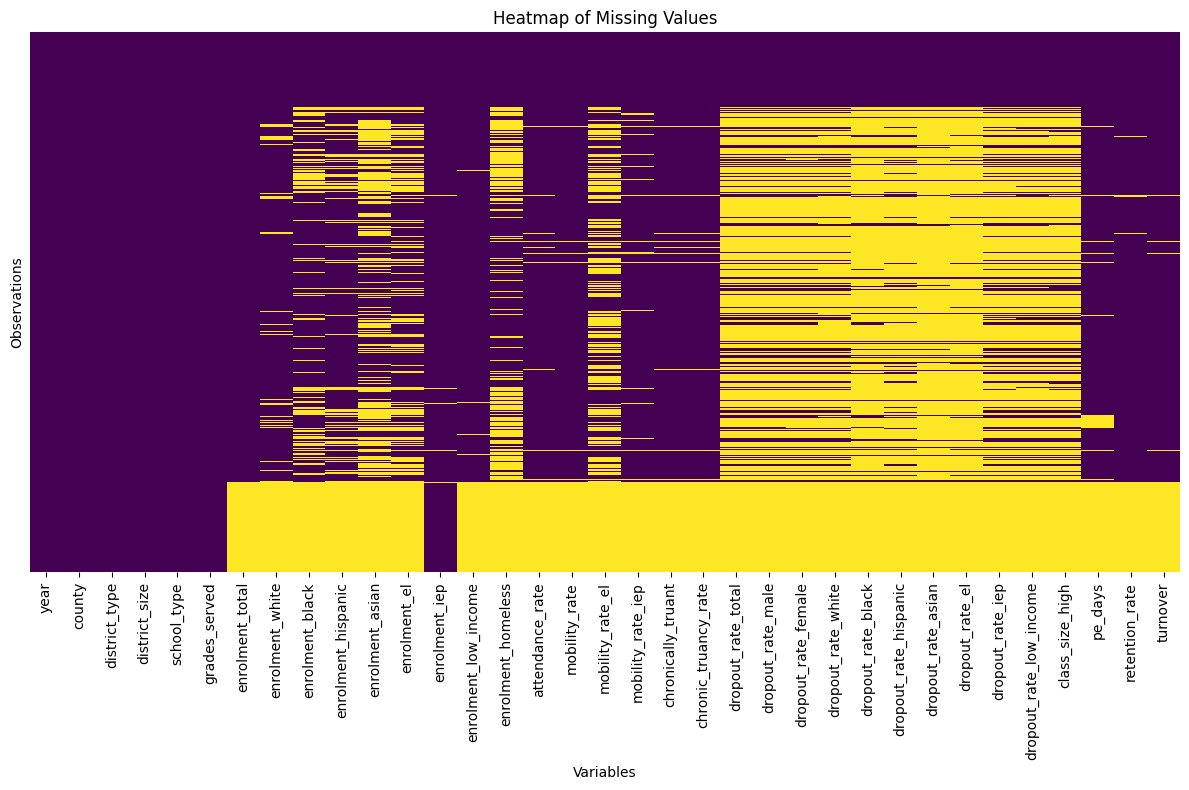

In [ ]:
#  create a heatmap to visualize the missing values
    # Set up the figure
plt.figure(figsize=(12, 8))

    # Create heatmap of missing values
sns.heatmap(df.isnull(),
            cbar=False,
            cmap='viridis',  # Options: 'viridis', 'magma', 'coolwarm', etc.
            yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.xlabel('Variables')
plt.ylabel('Observations')
plt.tight_layout()
plt.show()

In [ ]:
missing_threshold = 0.5  # 50% threshold

#   Calculate percentage of missing values per column
missing_percent = final_df.isnull().mean()

#   Filter columns where missing percentage is greater than 50%
high_missing_cols = missing_percent[missing_percent > missing_threshold]

#   Display the results
print("Columns with more than 5% missing values:")
print(high_missing_cols)

#   Drop these Columns
final_df.drop(columns=['grades_served', 'mobility_rate_el', 'dropout_rate_asian', 'enrolment_black', 'enrolment_hispanic',
                       'enrolment_white', 'enrolment_el', 'enrolment_homeless', 'mobility_rate_iep', 'dropout_rate_white','dropout_rate_black',
                       'dropout_rate_hispanic', 'dropout_rate_el','dropout_rate_female', 'dropout_rate_iep', 'dropout_rate_low_income',
                       'dropout_rate_male', 'enrolment_asian'], inplace=True)


#   Check final data without the columns
print(final_df.isnull().sum())

Columns with more than 5% missing values:
grades_served         0.995221
mobility_rate_el      0.642174
dropout_rate_asian    0.520908
dtype: float64
year                       0
county                     0
district_type              0
district_size              0
school_type                0
enrolment_total            0
enrolment_iep             51
enrolment_low_income       4
attendance_rate           31
mobility_rate              1
chronically_truant       595
chronic_truancy_rate     595
dropout_rate_total         2
class_size_high           33
pe_days                  128
retention_rate            19
turnover                  17
district_size_encoded     36
dtype: int64


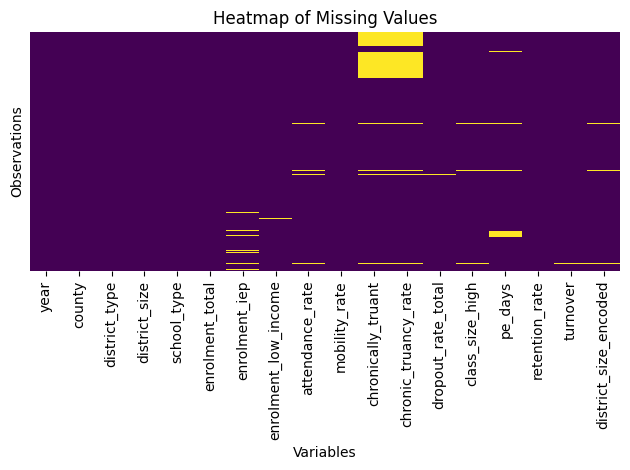

In [ ]:
sns.heatmap(final_df.isnull(),
            cbar=False,
            cmap='viridis',  # Options: 'viridis', 'magma', 'coolwarm', etc.
            yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.xlabel('Variables')
plt.ylabel('Observations')
plt.tight_layout()
plt.show()

In [ ]:
# 📌5. Data Imputation

In [ ]:
# Select only numeric columns
numeric_cols = final_df.select_dtypes(include=[np.number]).columns

# Perform Shapiro-Wilk test and store results
shapiro_results = []

for col in numeric_cols:
    stat, p_value = shapiro(final_df[col].dropna())  # Drop NaNs for test
    shapiro_results.append(
        {"Variable": col, "Test Statistic": stat, "p-value": p_value})

# Convert results to DataFrame
shapiro_df = pd.DataFrame(shapiro_results)

# Display the table
print(shapiro_df)

# Impute missing values with median for all numeric columns
final_df[numeric_cols] = final_df[numeric_cols].apply(
    lambda col: col.fillna(col.median()))

# Impute missing values in 'district_size' using the most frequent category (mode)
# Get the most common category
mode_value = final_df["district_size_encoded"].mode()[0]
final_df["district_size_encoded"] = final_df["district_size_encoded"].fillna(
    mode_value)  # Fill missing values

#   Check if missing values remain
print(final_df.isnull().sum())  # Should print 0 for numeric columns
print(final_df["year"].value_counts())
print(final_df["district_size_encoded"].value_counts())

                 Variable  Test Statistic       p-value
0                    year        0.910681  1.393641e-40
1         enrolment_total        0.829021  5.947605e-51
2           enrolment_iep        0.863993  6.902161e-47
3    enrolment_low_income        0.935252  7.032880e-36
4         attendance_rate        0.716221  1.055551e-59
5           mobility_rate        0.593196  1.076140e-66
6      chronically_truant        0.615072  1.784661e-61
7    chronic_truancy_rate        0.738682  1.601309e-54
8      dropout_rate_total        0.659943  2.972160e-63
9         class_size_high        0.971019  2.224360e-25
10                pe_days        0.573642  9.235518e-67
11         retention_rate        0.788586  1.693676e-54
12               turnover        0.645809  6.257997e-64
13  district_size_encoded        0.776370  2.191480e-55
year                     0
county                   0
district_type            0
district_size            0
school_type              0
enrolment_total          

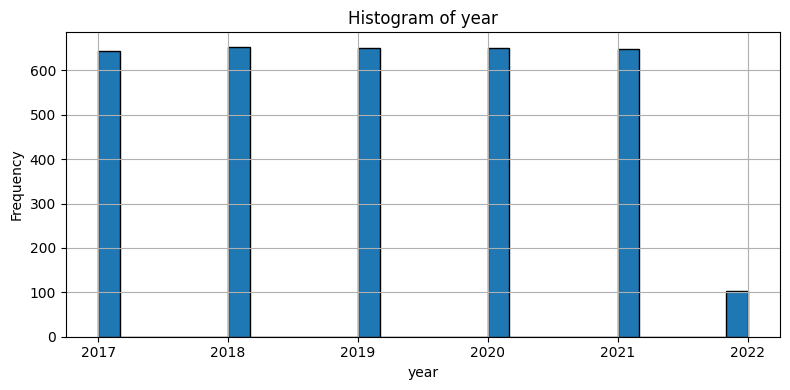

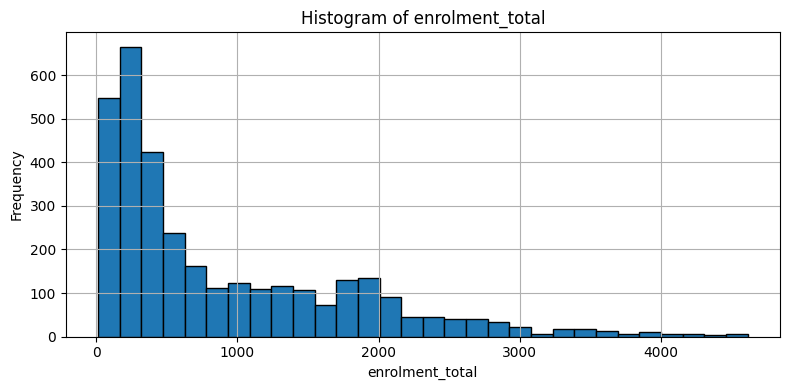

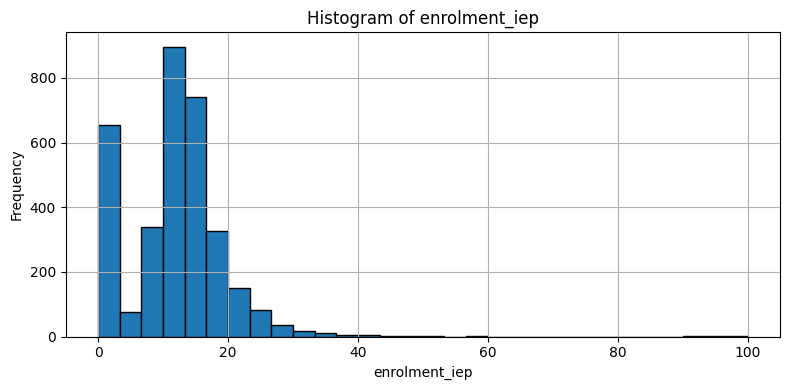

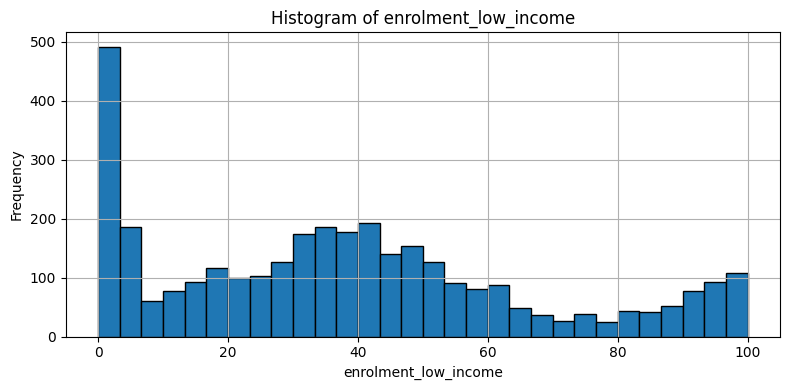

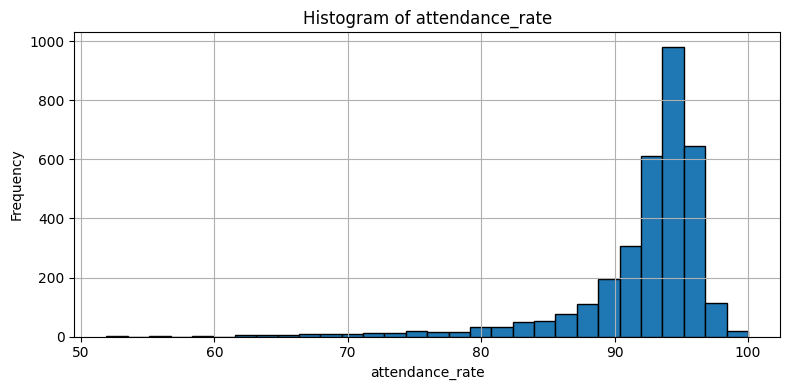

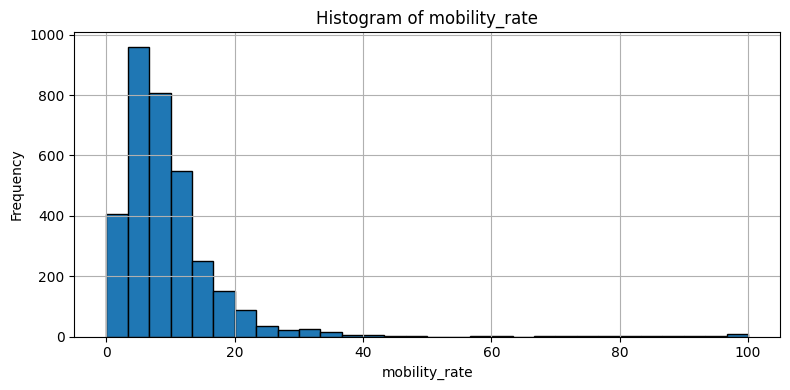

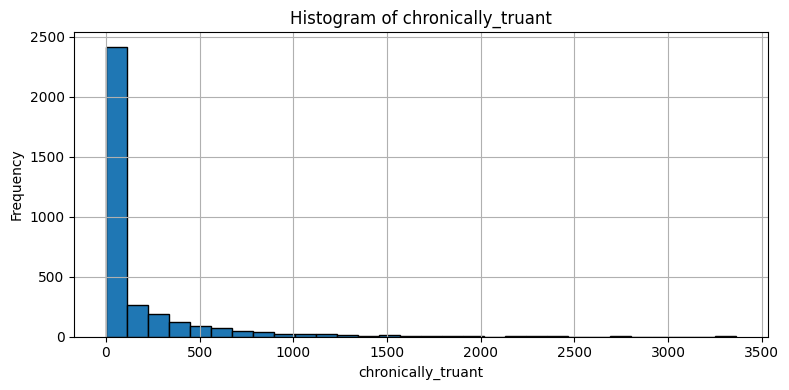

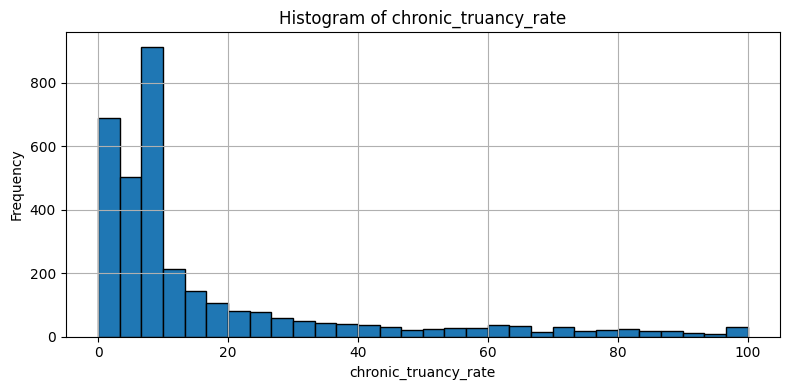

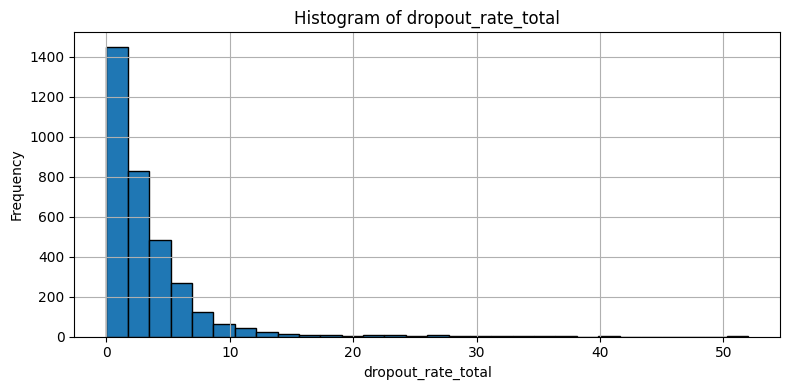

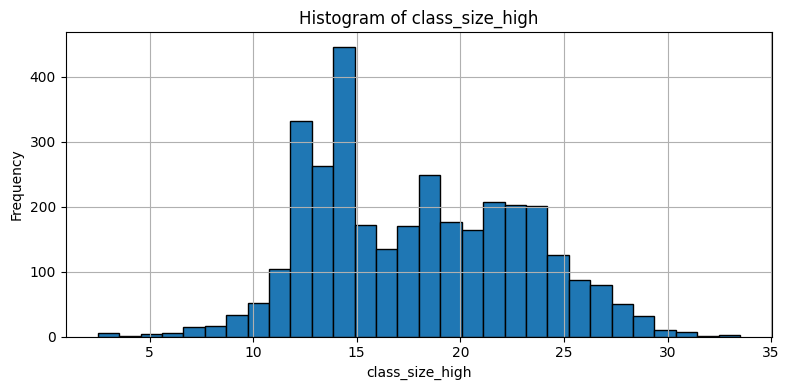

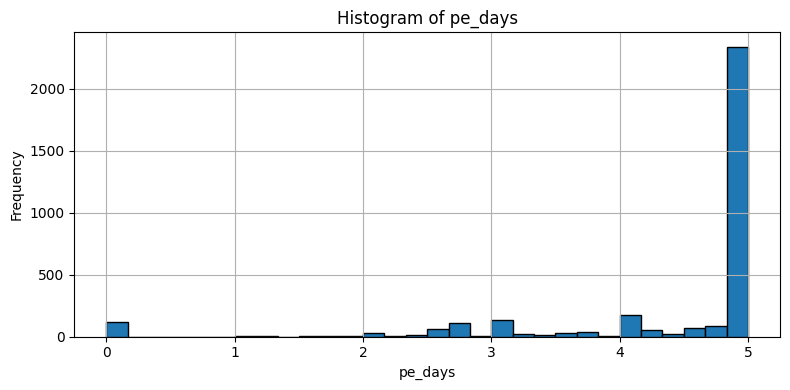

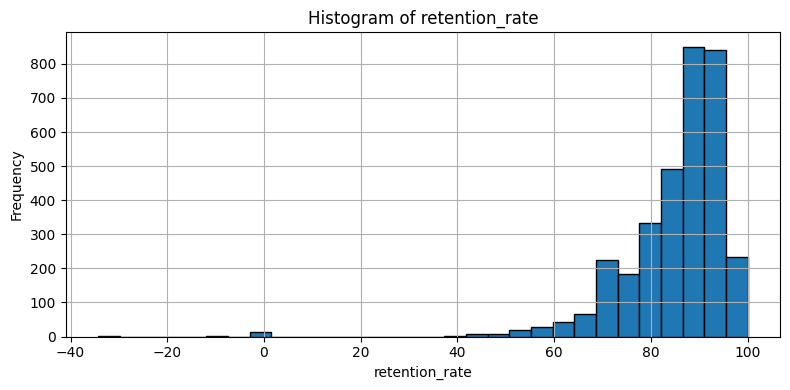

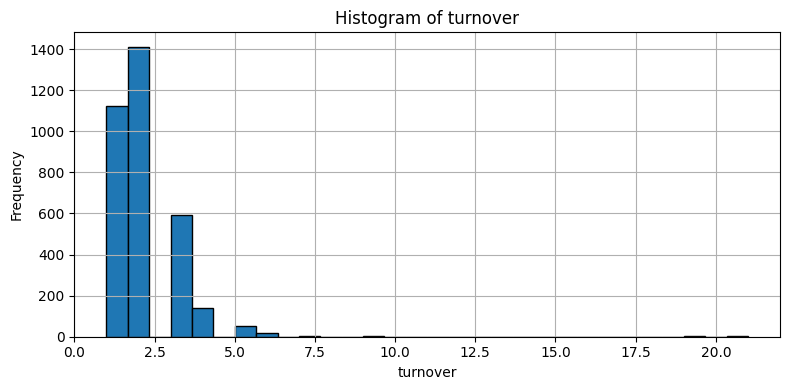

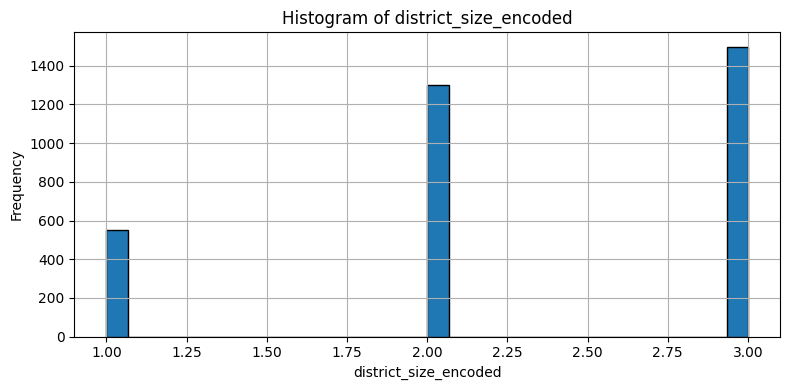

In [ ]:
# Create histograms for each numeric column

numeric_cols = final_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(final_df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# 📌6.   Check for outliers

In [ ]:
#   Compute Z-scores for numeric columns
numeric_cols = final_df.select_dtypes(include=[np.number]).columns

z_scores = final_df[numeric_cols].apply(zscore)

#   Flag outliers where |Z| > 3
outliers_z = (z_scores.abs() > 3)
print(outliers_z.sum())  # Count of outliers per column

year                       0
enrolment_total           49
enrolment_iep             26
enrolment_low_income       0
attendance_rate           91
mobility_rate             41
chronically_truant        88
chronic_truancy_rate      99
dropout_rate_total        60
class_size_high            3
pe_days                  120
retention_rate            40
turnover                  28
district_size_encoded      0
dtype: int64


In [ ]:
# 📌7.   Label Encoding

In [ ]:
    #   Covid Period.
    # Initialize LabelEncoder
le = LabelEncoder()

    # Categorize and encode the covid_period variable in one step
final_df["covid_period"] = le.fit_transform(final_df["year"].apply(
    lambda x: "Pre-COVID" if x < 2020 else "During-COVID"))

# Check encoding
print(final_df["year"].value_counts())
print(final_df["covid_period"].value_counts())
print(final_df.info())

year
2018    653
2020    651
2019    650
2021    648
2017    644
2022    102
Name: count, dtype: int64
covid_period
1    1947
0    1401
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   3348 non-null   int64  
 1   county                 3348 non-null   object 
 2   district_type          3348 non-null   object 
 3   district_size          3348 non-null   object 
 4   school_type            3348 non-null   object 
 5   enrolment_total        3348 non-null   float64
 6   enrolment_iep          3348 non-null   float64
 7   enrolment_low_income   3348 non-null   float64
 8   attendance_rate        3348 non-null   float64
 9   mobility_rate          3348 non-null   float64
 10  chronically_truant     3348 non-null   float64
 11  chronic_truancy_rate   3348 non-null   float64
 12

In [ ]:
# 📌8.  Scale the DataFrame

In [ ]:
#   Selecting only numeric columns for scaling
numeric_cols = final_df.select_dtypes(include=[np.number]).columns

#   Standardizing
scaler = StandardScaler()
final_df[numeric_cols] = scaler.fit_transform(final_df[numeric_cols])

In [ ]:
# 📌9.  Generate Graphs

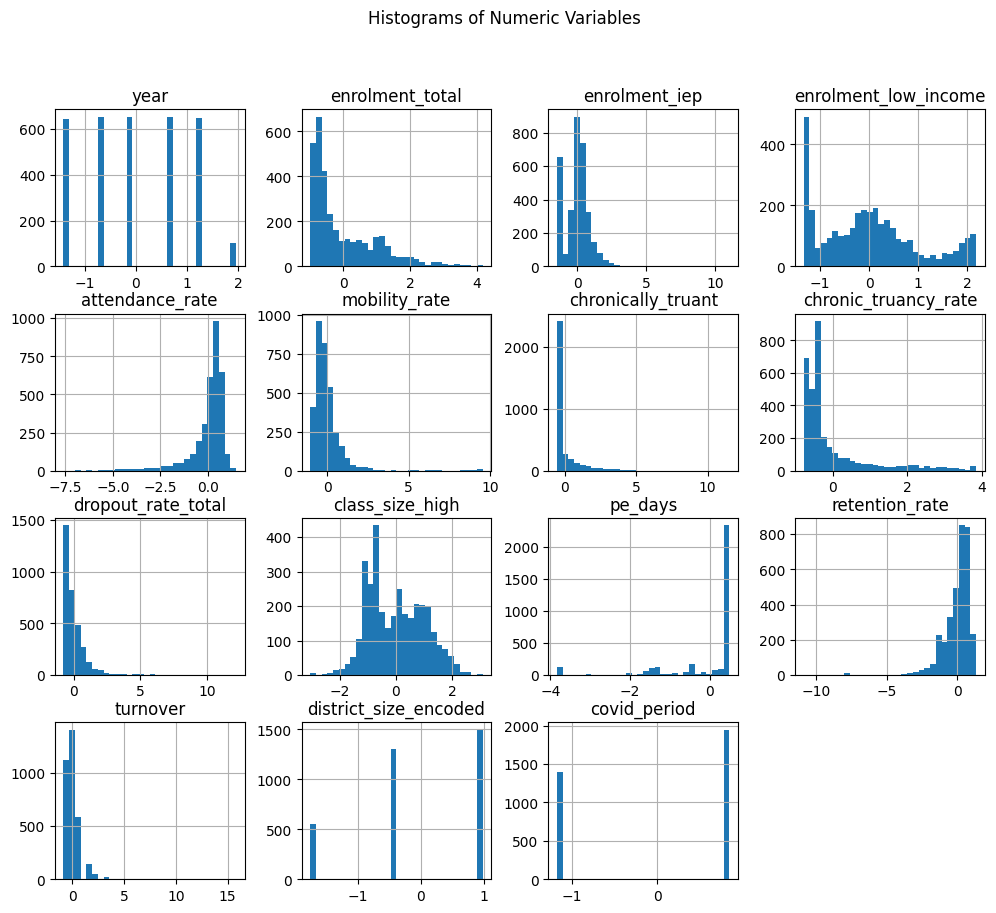

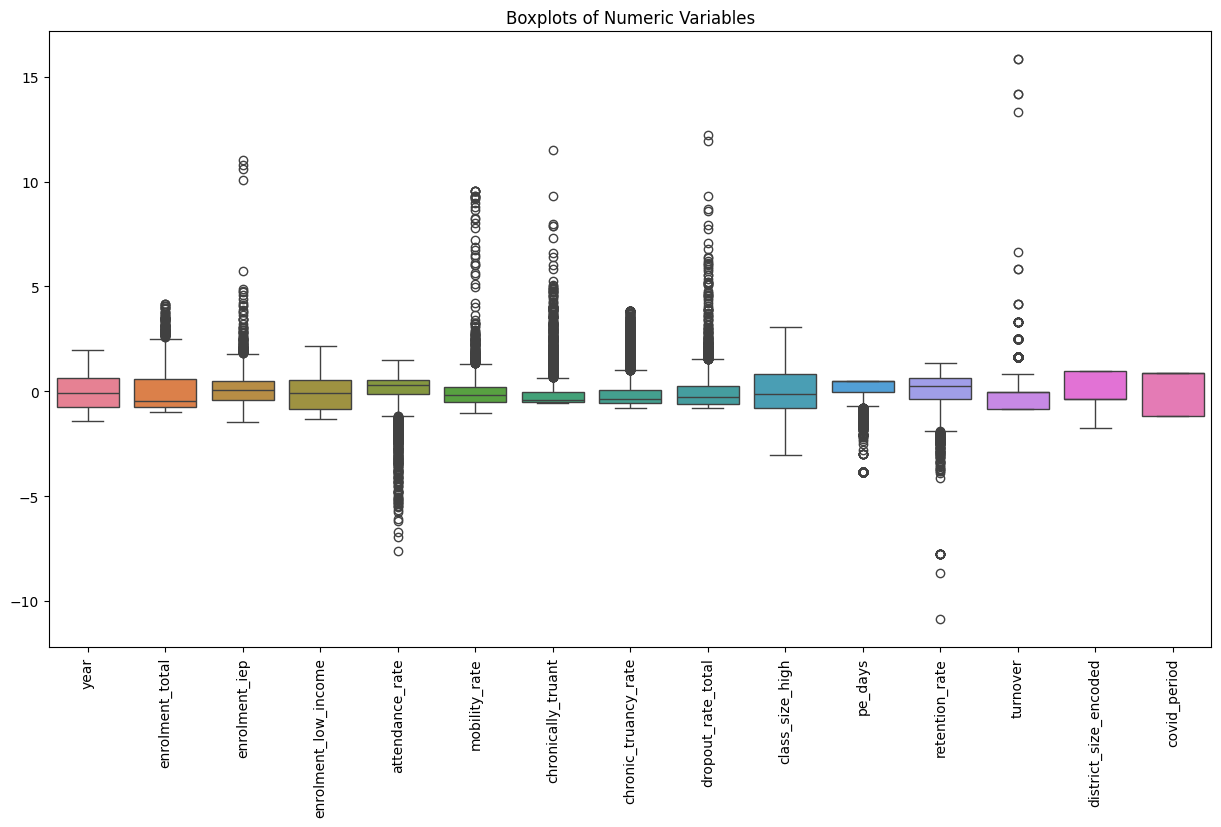

In [ ]:
#   Histogram
final_df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numeric Variables")
plt.show()

#   Box Plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=final_df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Variables")
plt.show()

In [ ]:
# 📌10.  Apply Transformations Based on Skewness

turnover                 5.523822
mobility_rate            5.195191
dropout_rate_total       4.097482
chronically_truant       3.546945
chronic_truancy_rate     2.089313
enrolment_iep            1.748710
enrolment_total          1.378956
enrolment_low_income     0.523224
class_size_high          0.243904
year                     0.066278
covid_period            -0.330591
district_size_encoded   -0.493045
pe_days                 -2.427657
attendance_rate         -2.816221
retention_rate          -2.990827
dtype: float64
chronically_truant       0.729039
chronic_truancy_rate     0.392842
enrolment_total          0.321958
enrolment_iep            0.246985
dropout_rate_total       0.186979
turnover                 0.127348
enrolment_low_income     0.075987
mobility_rate            0.067474
attendance_rate          0.032600
year                     0.018569
class_size_high         -0.002446
retention_rate          -0.056565
district_size_encoded   -0.184868
covid_period            -0.330591

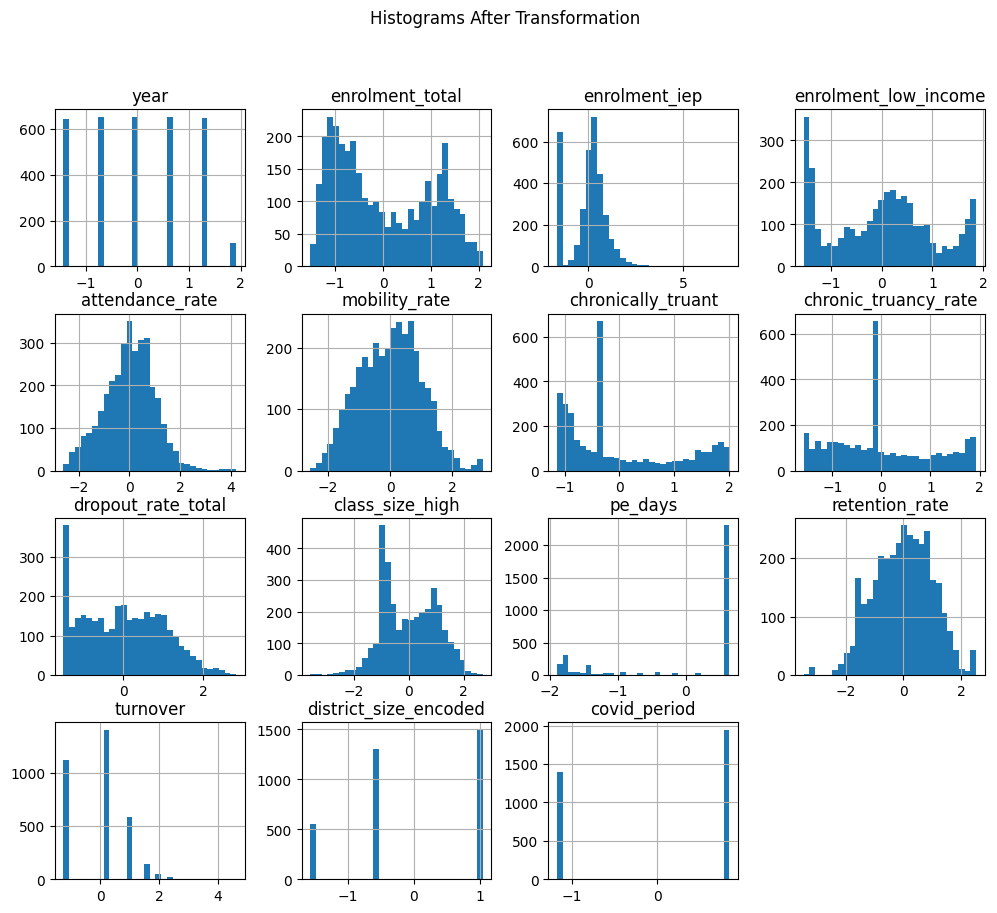

In [ ]:
# Compute skewness for each numeric column
skew_vals = final_df[numeric_cols].apply(skew).sort_values(ascending=False)
print(skew_vals)

#   Yeo-Johnson Transformation(For Both Right and Left Skewness)
pt = PowerTransformer(method='yeo-johnson')  # Works with negative values too
pt = PowerTransformer(method='yeo-johnson')  # Works with negative values too
final_df[numeric_cols] = pt.fit_transform(final_df[numeric_cols])

#   And check skewness again
print(final_df[numeric_cols].apply(skew).sort_values(ascending=False))

#   Another set of Histograms
final_df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms After Transformation")
plt.show()

In [ ]:
# 📌11. Compute correlation matrix

                           year  enrolment_total  enrolment_iep  \
year                   1.000000         0.028304       0.592033   
enrolment_total        0.028304         1.000000      -0.136130   
enrolment_iep          0.592033        -0.136130       1.000000   
enrolment_low_income   0.504989        -0.110978       0.731532   
attendance_rate        0.003792        -0.100089      -0.167228   
mobility_rate          0.068990        -0.251947       0.328008   
chronically_truant     0.308279         0.538165       0.237047   
chronic_truancy_rate   0.292091         0.086233       0.306915   
dropout_rate_total     0.333220        -0.037618       0.384130   
class_size_high        0.357329         0.580170       0.252712   
pe_days                0.109942        -0.007830       0.115353   
retention_rate         0.294124         0.293348       0.135000   
turnover              -0.030897         0.104177       0.040001   
district_size_encoded  0.046165         0.658328       0.01492

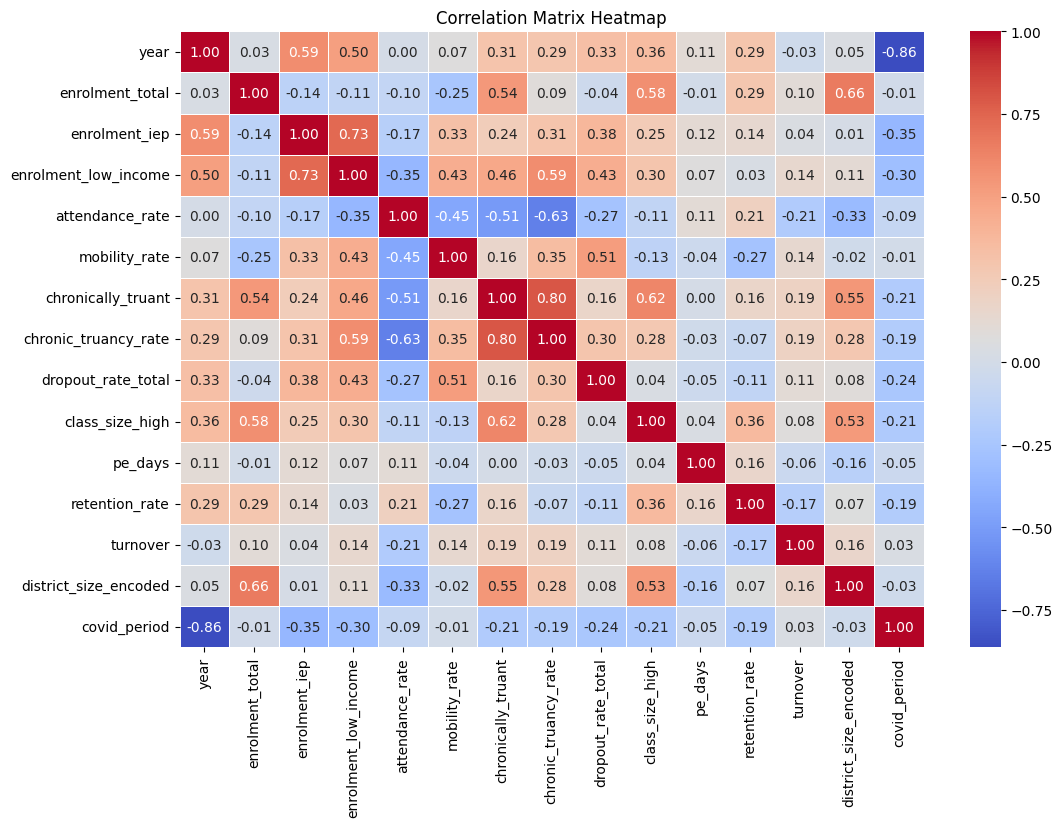

In [ ]:
# Select only numeric columns
numeric_df = final_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation values
print(corr_matrix)

#   Visualize the Correlation Matrix (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# 📌12. Feature Engineering

In [ ]:
# Compute VIF for each feature
numeric_df = numeric_df.dropna()  # Ensure no missing values
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(
    numeric_df.values, i) for i in range(len(numeric_df.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

#   Drop these 2 since have high VIF
numeric_df.drop(columns=["chronically_truant","year"], inplace=True)

# Compute VIF for each feature again
numeric_df = numeric_df.dropna()  # Ensure no missing values
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(
    numeric_df.values, i) for i in range(len(numeric_df.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                  Feature       VIF
6      chronically_truant  9.970343
0                    year  7.734340
7    chronic_truancy_rate  7.114512
14           covid_period  5.110812
1         enrolment_total  4.026389
3    enrolment_low_income  3.542430
2           enrolment_iep  2.968827
9         class_size_high  2.718993
13  district_size_encoded  2.320221
4         attendance_rate  2.193156
5           mobility_rate  2.003603
8      dropout_rate_total  1.734799
11         retention_rate  1.495869
12               turnover  1.111874
10                pe_days  1.098141
                  Feature       VIF
2    enrolment_low_income  3.498563
0         enrolment_total  2.651623
1           enrolment_iep  2.531521
5    chronic_truancy_rate  2.484748
11  district_size_encoded  2.288264
7         class_size_high  2.246883
3         attendance_rate  2.190515
4           mobility_rate  1.908620
6      dropout_rate_total  1.595715
9          retention_rate  1.431174
12           covid_period  1

In [ ]:
# 📌13.     Predictive Modeling

In [ ]:
# Define the target variable
target = "dropout_rate_total"

# Select all numeric features except the target variable
X = numeric_df.select_dtypes(include=[np.number]).drop(
    columns=[target], errors="ignore")

# Define the dependent variable
y = numeric_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Multiple Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train the XGBoost Model
# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Function (Stores Metrics in Variables)
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"\nModel: {model_name}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    return r2, mae, rmse

# Store metrics for later use
r2_lr, mae_lr, rmse_lr = evaluate_model(y_test, y_pred_lr, "Multiple Linear Regression")
r2_rf, mae_rf, rmse_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
r2_xgb, mae_xgb, rmse_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost")


Model: Multiple Linear Regression
R² Score: 0.3224
Mean Absolute Error (MAE): 0.6512
Root Mean Squared Error (RMSE): 0.8302

Model: Random Forest
R² Score: 0.4774
Mean Absolute Error (MAE): 0.5562
Root Mean Squared Error (RMSE): 0.7291

Model: XGBoost
R² Score: 0.5140
Mean Absolute Error (MAE): 0.5328
Root Mean Squared Error (RMSE): 0.7030


In [ ]:
# 📌14.     Get Feature Importance

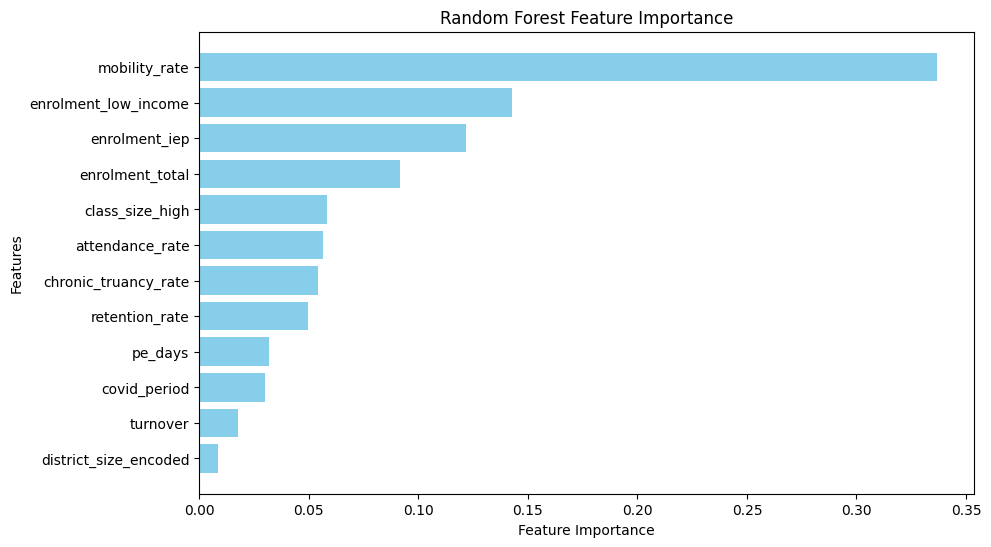

                 Feature  Importance
4          mobility_rate    0.336852
2   enrolment_low_income    0.142670
1          enrolment_iep    0.121930
0        enrolment_total    0.091451
6        class_size_high    0.058391
3        attendance_rate    0.056684
5   chronic_truancy_rate    0.054368
8         retention_rate    0.049470
7                pe_days    0.031662
11          covid_period    0.030011


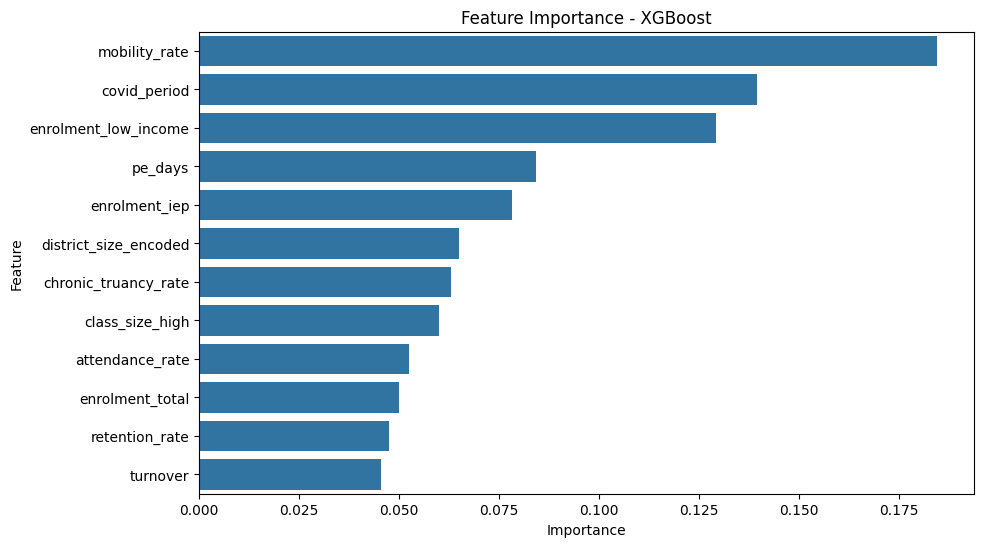

In [ ]:
          # Random Forest.
# Extract feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display importance
importance_df = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'],
         importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Display top features
print(importance_df.head(10))  # Show top 10 most important features

          # XGBoost

# Extract and plot feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance - XGBoost")
plt.show()

In [ ]:
# 📌15. Hyperparameter Tuning for linear regression, Random Forest, and XGBoost

In [ ]:
# Multicollinearity Assessment
# --------------------------
# 1️⃣ Calculate VIF (Before Elastic Net)
# --------------------------

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    return vif_data

vif_before = calculate_vif(X_train)
print("\n🔹 Variance Inflation Factor (Before Elastic Net):")
print(vif_before.sort_values(by="VIF", ascending=False))

# --------------------------
# 2️⃣ Elastic Net Regression for Feature Selection
# --------------------------

elastic_cv = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 1],
                          alphas=np.logspace(-3, 2, 50),
                          cv=5,
                          random_state=42)
elastic_cv.fit(X_train, y_train)

elastic_coeff = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": elastic_cv.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n🔹 Elastic Net Coefficients (Feature Selection Results):")
print(elastic_coeff)

# Identify features retained by Elastic Net
selected_features = elastic_coeff[elastic_coeff["Coefficient"] != 0]["Feature"].tolist()
print("\n✅ Features Selected by Elastic Net:", selected_features)

# --------------------------
# 3️⃣ Calculate VIF After Feature Selection
# --------------------------

if len(selected_features) > 1:
    vif_after = calculate_vif(X_train[selected_features])
    print("\n🔹 Variance Inflation Factor (After Elastic Net):")
    print(vif_after.sort_values(by="VIF", ascending=False))
else:
    print("\n⚠️ Only one feature selected, VIF not applicable.")


🔹 Variance Inflation Factor (Before Elastic Net):
                  Feature       VIF
2    enrolment_low_income  3.315633
0         enrolment_total  2.610309
5    chronic_truancy_rate  2.496077
1           enrolment_iep  2.413378
10  district_size_encoded  2.258505
6         class_size_high  2.225051
3         attendance_rate  2.223040
4           mobility_rate  1.645164
8          retention_rate  1.430709
11           covid_period  1.286779
9                turnover  1.104185
7                 pe_days  1.084461

🔹 Elastic Net Coefficients (Feature Selection Results):
                  Feature  Coefficient
4           mobility_rate     0.420463
2    enrolment_low_income     0.152173
0         enrolment_total     0.138385
1           enrolment_iep     0.117085
9                turnover     0.006308
3         attendance_rate    -0.000000
10  district_size_encoded    -0.000000
5    chronic_truancy_rate     0.000000
7                 pe_days    -0.045972
8          retention_rate    -0.06

In [ ]:
          # Linear regression
# Standardize data + fit Ridge regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid search with cross-validation
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print("Best R² score:", grid_search.best_score_)
print("Best alpha:", grid_search.best_params_['ridge__alpha'])

Best R² score: 0.37576873303409963
Best alpha: 10


In [ ]:
          # Random Forest
# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf
    'max_features': ['sqrt', 'log2']  # Number of features per split
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='r2',  # Optimize for R-squared
    verbose=2,
    n_jobs=-1,  # Use all processors
    random_state=42
)

# Fit the model
rf_random.fit(X_train, y_train)

# Best parameters
best_rf = rf_random.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Best Hyperparameters:", rf_random.best_params_)

# Train the final model with best parameters
best_rf = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=20,
    random_state=42
)

# Fit the model on training data
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Tuned Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Tuned Model Performance:
R² Score: 0.5009
Mean Absolute Error (MAE): 0.5549
Root Mean Squared Error (RMSE): 0.7125


In [ ]:
          # XGBoost

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=30,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)

# Best parameters and model
best_xgb = xgb_random.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("Best Hyperparameters:", xgb_random.best_params_)
evaluate_model(y_test, y_pred_best_xgb, "XGBoost (Tuned)")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Model: XGBoost (Tuned)
R² Score: 0.4964
Mean Absolute Error (MAE): 0.5443
Root Mean Squared Error (RMSE): 0.7157


(0.4963687613499552, 0.5443028345768032, np.float64(0.7157020338294894))

In [ ]:
# Evaluation & Parsimony Metrics
def evaluate_model(y_true, y_pred, model_name, model_obj):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    n_params = count_model_parameters(model_obj)

    print(f"\nModel: {model_name}")
    # Use a try-except block to handle models that don't have get_params
    try:
        print(f"Best Params: {model_obj.get_params()}")
    except AttributeError:
        print("Best Params: N/A (Model does not support get_params)")

    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Parsimony (Fewer is better): {n_params} Parameters")

    return r2, mae, rmse, n_params

def count_model_parameters(model):
    if isinstance(model, Pipeline):
        # Corrected indentation
        model = model.named_steps['ridge'] # Assuming 'ridge' is the name in the pipeline

    if hasattr(model, 'coef_'):
        return np.count_nonzero(model.coef_)
    elif isinstance(model, RandomForestRegressor):
        # Sum the number of nodes in all trees
        total_nodes = 0
        if hasattr(model, 'estimators_'): # Check if estimators exist (after fitting)
          for est in model.estimators_:
              total_nodes += est.tree_.node_count
          return total_nodes
        else:
            return 0 # Model not yet fitted
    else:
        return 0  # Fallback

evaluate_model(y_test, y_pred_lr, "Linear Regression (Ridge)", best_lr)
evaluate_model(y_test, y_pred_rf, "Random Forest", best_rf)
evaluate_model(y_test, y_pred_best_xgb, "XGBoost (Tuned)", best_xgb)


Model: Linear Regression (Ridge)
Best Params: {'memory': None, 'steps': [('scaler', StandardScaler()), ('ridge', Ridge(alpha=10))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'ridge': Ridge(alpha=10), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'ridge__alpha': 10, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.0001}
R² Score: 0.3225
MAE: 0.6514
RMSE: 0.8301
Parsimony (Fewer is better): 12 Parameters

Model: Random Forest
Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 

(0.4963687613499552, 0.5443028345768032, np.float64(0.7157020338294894), 0)

In [ ]:
# 📌16. Get feature importances

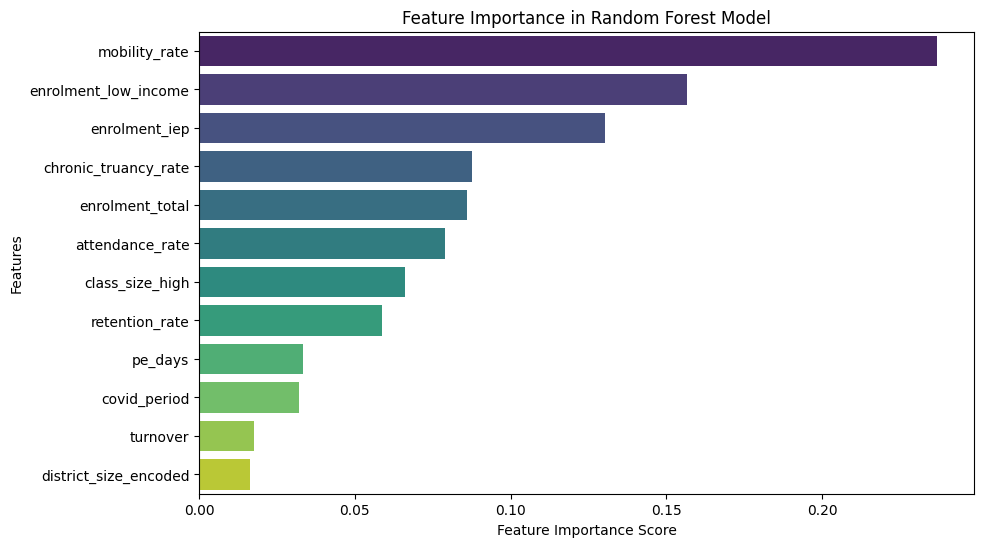

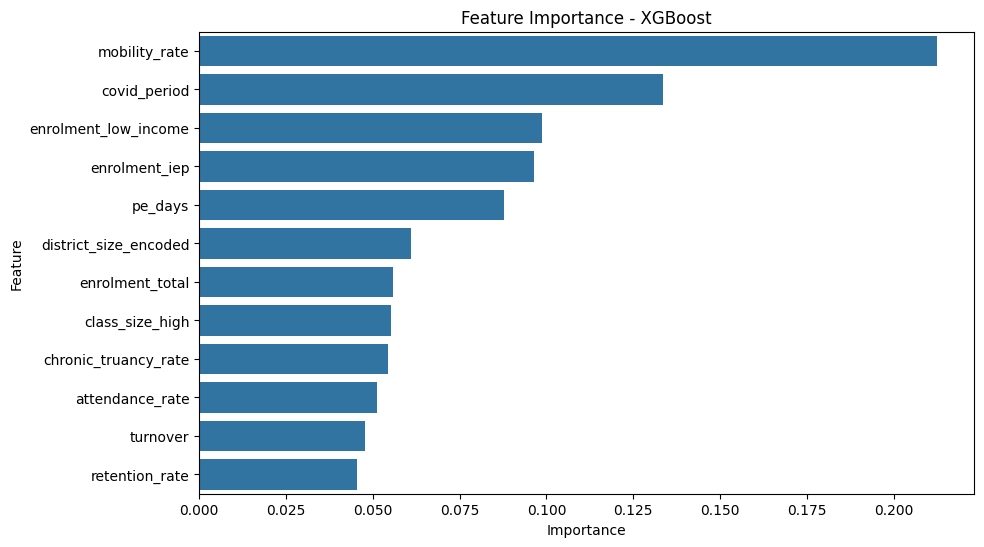

In [ ]:
          # Random Forest.
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(
    by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance, hue='Feature', dodge=False, palette='viridis', legend=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()

          # XGBoost
# Extract and plot feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance - XGBoost")
plt.show()

In [ ]:
# 📌17. Residual Analysis for the Random Forest Model and XGBoost

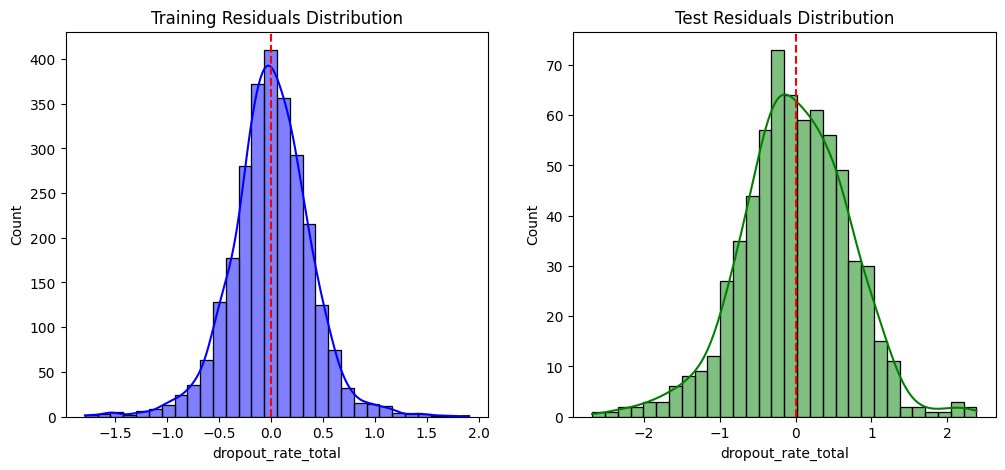

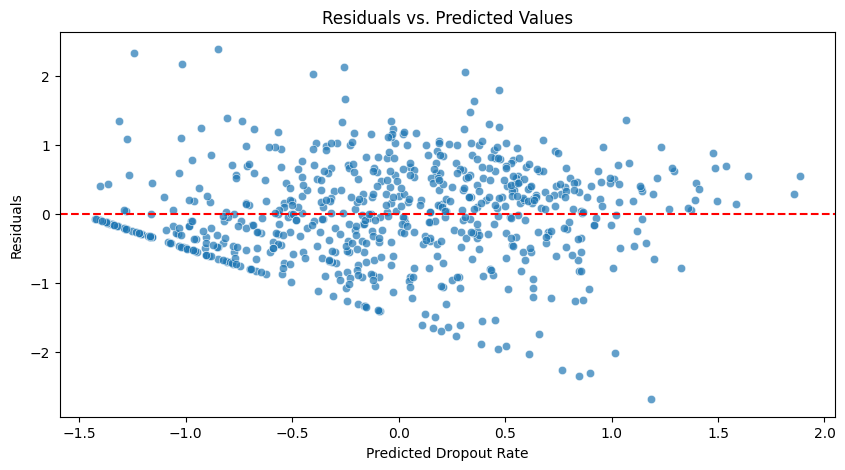

In [ ]:
          # Random Forest
# Predict on training data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(12, 5))

# Training residuals
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='red', linestyle='dashed')
plt.title('Training Residuals Distribution')

# Test residuals
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, bins=30, color='green')
plt.axvline(0, color='red', linestyle='dashed')
plt.title('Test Residuals Distribution')

plt.show()

#   Residuals vs. Predicted Values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_pred, y=test_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Predicted Dropout Rate')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

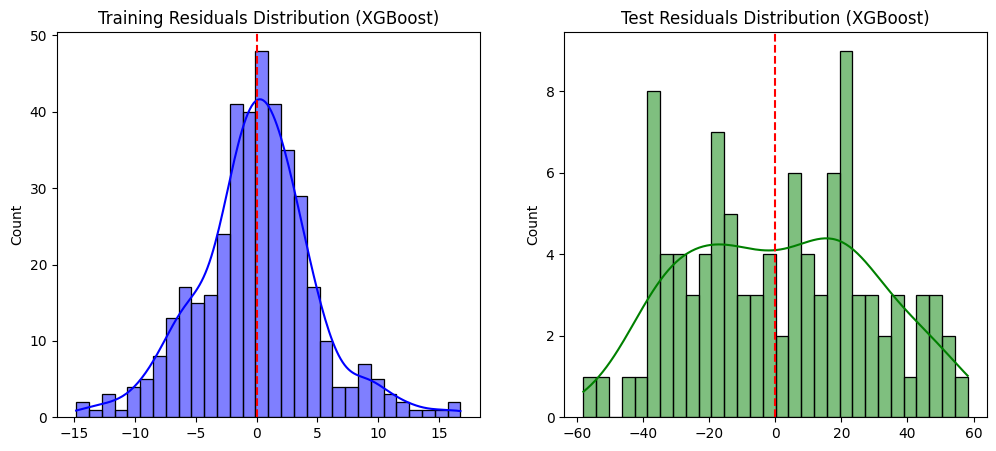

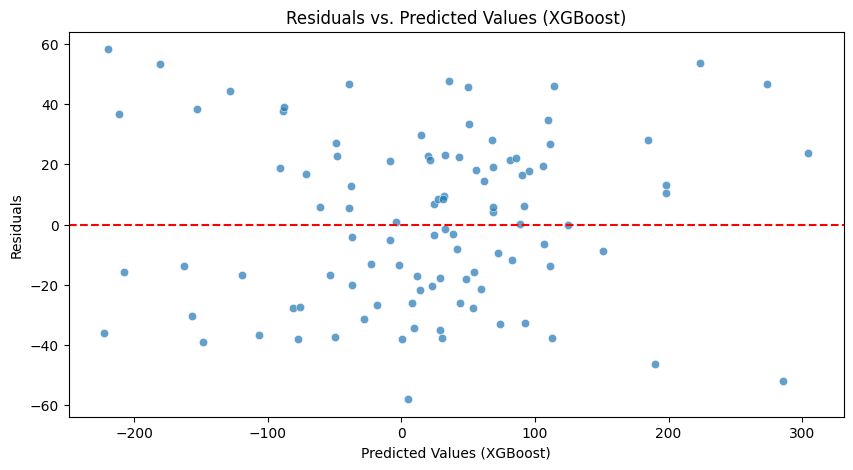

In [ ]:
          # XGBoost
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=15, random_state=42)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train an XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# 4. Predict on train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# 5. Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# 6. Plot residual histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='red', linestyle='dashed')
plt.title('Training Residuals Distribution (XGBoost)')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, bins=30, color='green')
plt.axvline(0, color='red', linestyle='dashed')
plt.title('Test Residuals Distribution (XGBoost)')

plt.show()

# 7. Residuals vs Predicted Values plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_pred, y=test_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Predicted Values (XGBoost)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (XGBoost)')
plt.show()

In [ ]:
# 📌18. Baseline Models for Comparison

In [ ]:
#   Baseline 1: Mean Predictor(Dummy Regressor)
# Initialize Dummy Regressor (Mean Predictor)
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)

# Predictions
y_pred_dummy = dummy_model.predict(X_test)

# Evaluate Performance
r2_dummy = r2_score(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))

# Print results
print(f"Baseline (Mean Predictor) R² Score: {r2_dummy:.4f}")
print(f"Baseline (Mean Predictor) MAE: {mae_dummy:.4f}")
print(f"Baseline (Mean Predictor) RMSE: {rmse_dummy:.4f}")

Baseline (Mean Predictor) R² Score: -0.0251
Baseline (Mean Predictor) MAE: 85.7138
Baseline (Mean Predictor) RMSE: 110.8567


In [ ]:
## Baseline 2: Single Feature Linear Regression (mobility_rate)

# Use the properly scaled final_df directly
target = "dropout_rate_total"
y = numeric_df[target]
X_mobility = numeric_df[['mobility_rate']]  # Single feature

# Redo the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_mobility, y, test_size=0.2, random_state=42)

baseline_lr = LinearRegression()
baseline_lr.fit(X_train, y_train)
y_pred_baseline_lr = baseline_lr.predict(X_test)

print("\n📌 Baseline 2: Single Feature Linear Regression (mobility_rate)")
r2_baseline_lr = r2_score(y_test, y_pred_baseline_lr)
mae_baseline_lr = mean_absolute_error(y_test, y_pred_baseline_lr)
rmse_baseline_lr = np.sqrt(mean_squared_error(y_test, y_pred_baseline_lr))

print(f"R²: {r2_baseline_lr:.4f}")
print(f"MAE: {mae_baseline_lr:.4f}")
print(f"RMSE: {rmse_baseline_lr:.4f}")

# Store for comparison
r2_baseline_lr = r2_score(y_test, y_pred_baseline_lr)
mae_baseline_lr = mean_absolute_error(y_test, y_pred_baseline_lr)
rmse_baseline_lr = np.sqrt(mean_squared_error(y_test, y_pred_baseline_lr))


📌 Baseline 2: Single Feature Linear Regression (mobility_rate)
R²: 0.2067
MAE: 0.7154
RMSE: 0.8982


In [ ]:
# Re-calculate evaluation metrics for Linear Regression, Random Forest, and XGBoost
# These were originally calculated in cell CmiIAPw9ts7Y
# Train Multiple Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Train the XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

#   Compare with Random Forest, Multiple Linear Regression, and XGBoost
# Store results in a DataFrame

results = pd.DataFrame({
    "Model": ["Baseline (Mean Predictor)", "Baseline (Single Feature LR)", "Multiple Linear Regression", "Random Forest", "XGBoost"],
    "R² Score": [r2_dummy, r2_baseline_lr, r2_lr, r2_rf, r2_xgb],
    "MAE": [mae_dummy, mae_baseline_lr, mae_lr, mae_rf, mae_xgb],
    "RMSE": [rmse_dummy, rmse_baseline_lr, rmse_lr, rmse_rf, rmse_xgb]
})

# Display results
print("\n🔹 Final Model Performance Comparison:")
print(results)


🔹 Final Model Performance Comparison:
                          Model  R² Score        MAE        RMSE
0     Baseline (Mean Predictor) -0.025057  85.713802  110.856724
1  Baseline (Single Feature LR)  0.206699   0.715377    0.898245
2    Multiple Linear Regression  0.206699   0.715377    0.898245
3                 Random Forest  0.117868   0.754749    0.947202
4                       XGBoost  0.165288   0.740296    0.921391


In [ ]:
#   📌19.   Save the final Data

In [ ]:
# Save numeric_df as an Excel file
numeric_df.to_excel("Analysis Data.xlsx", index=False)
print("File saved successfully as 'Analysis Data.xlsx'")


File saved successfully as 'Analysis Data.xlsx'


In [ ]:
# Download the file to computer
from google.colab import files
files.download('Analysis Data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>